In [1]:
setwd("~/R/code-base/analyticvidya/titanic/")
train = read.csv("train.csv")
test = read.csv('test.csv')

# let's do some feature engineering

In [2]:
train$Name[1:3]

[1] Braund, Mr. Owen Harris                            
[2] Cumings, Mrs. John Bradley (Florence Briggs Thayer)
[3] Heikkinen, Miss. Laina                             
891 Levels: Abbing, Mr. Anthony ... Zimmerman, Mr. Leo

In [3]:
test$Survived = NA

In [4]:
names(train)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

In [5]:
names(test)

[1] "PassengerId" "Pclass"      "Name"        "Sex"         "Age"        
 [6] "SibSp"       "Parch"       "Ticket"      "Fare"        "Cabin"      
[11] "Embarked"    "Survived"

In [6]:
combi = rbind(train, test)

In [7]:
combi$Name = as.character(combi$Name)

In [8]:
combi$Name[1]

[1] "Braund, Mr. Owen Harris"

In [9]:
strsplit(combi$Name[1], split = '[,.]')[1]

[[1]]
[1] "Braund"       " Mr"          " Owen Harris"

In [10]:
strsplit(combi$Name[1], split = '[,.]')[[1]]

[1] "Braund"       " Mr"          " Owen Harris"

In [11]:
strsplit(combi$Name[1], split = '[,.]')[[1]][2]

[1] " Mr"

In [12]:
combi$Title = sapply(combi$Name, FUN = function(x) {strsplit(x, split = '[,.]')[[1]][2]})

In [13]:
combi$Title[1:3]

[1] " Mr"   " Mrs"  " Miss"

In [14]:
combi$Title = sub(' ', '', combi$Title)

In [15]:
combi$Title[1:3]

[1] "Mr"   "Mrs"  "Miss"

In [16]:
# let't have a look on entire data of title col
table(combi$Title)


        Capt          Col          Don         Dona           Dr     Jonkheer 
           1            4            1            1            8            1 
        Lady        Major       Master         Miss         Mlle          Mme 
           1            2           61          260            2            1 
          Mr          Mrs           Ms          Rev          Sir the Countess 
         757          197            2            8            1            1 

In [17]:
combi$Title[combi$Title %in% c('Mme', 'Mlle')] <- 'Mlle'

In [18]:
combi$Title[combi$Title %in% c('Capt', 'Don', 'Major', 'Sir')] <- 'Sir'

In [19]:
combi$Title[combi$Title %in% c('Dona', 'Lady', 'the Countess', 'Jonkheer')] <- 'Lady'

In [20]:
table(combi$Title)


   Col     Dr   Lady Master   Miss   Mlle     Mr    Mrs     Ms    Rev    Sir 
     4      8      4     61    260      3    757    197      2      8      5 

In [21]:
combi$Title <- factor(combi$Title)

In [22]:
combi$FamilySize <- combi$SibSp + combi$Parch + 1

In [23]:
combi$Surname <- sapply(combi$Name, FUN=function(x) {strsplit(x, split='[,.]')[[1]][1]})

In [24]:
combi$FamilyID <- paste(as.character(combi$FamilySize), combi$Surname, sep="")

In [25]:
combi$FamilyID[1:3]

[1] "2Braund"    "2Cumings"   "1Heikkinen"

In [26]:
# make small family (<2) as a separate entry
combi$FamilyID[combi$FamilySize <= 2] <- 'Small'

In [27]:
table(combi$FamilyID)


           11Sage           3Abbott         3Appleton         3Beckwith 
               11                 3                 1                 2 
          3Boulos           3Bourke            3Brown         3Caldwell 
                3                 3                 4                 3 
         3Christy          3Collyer          3Compton          3Cornell 
                2                 3                 3                 1 
          3Coutts           3Crosby           3Danbom           3Davies 
                3                 3                 3                 5 
           3Dodge          3Douglas             3Drew            3Elias 
                3                 1                 3                 3 
      3Frauenthal        3Frolicher 3Frolicher-Stehli        3Goldsmith 
                1                 1                 2                 3 
      3Gustafsson       3Hamalainen           3Hansen             3Hart 
                2                 2               

In [28]:
famIDs <- data.frame(table(combi$FamilyID))

In [29]:
famIDs

Var1,Freq
11Sage,11
3Abbott,3
3Appleton,1
3Beckwith,2
3Boulos,3
3Bourke,3
3Brown,4
3Caldwell,3
3Christy,2
3Collyer,3


In [30]:
famIDs <- famIDs[famIDs$Freq <= 2,]

In [31]:
famIDs

,Var1,Freq
3,3Appleton,1
4,3Beckwith,2
9,3Christy,2
12,3Cornell,1
18,3Douglas,1
21,3Frauenthal,1
22,3Frolicher,1
23,3Frolicher-Stehli,2
25,3Gustafsson,2
26,3Hamalainen,2


In [32]:
combi$FamilyID[combi$FamilyID %in% famIDs$Var1] <- 'Small'

In [33]:
combi$FamilyID <- factor(combi$FamilyID)

In [34]:
train <- combi[1:891,]
test <- combi[892:1309,]

In [36]:
library(rpart)

In [37]:
fit <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + Title + FamilySize + FamilyID,
               data=train, 
               method="class")

In [38]:
prediction=predict(fit, test, type='class')
submit = data.frame(PassengerID = test$PassengerId, Survived = prediction)
write.csv(submit, 'feature_eng_dt.csv', row.names=FALSE)

In [39]:
submit[1:2,]

,PassengerID,Survived
892,892,0
893,893,0


# let's try RF

In [40]:
summary(combi$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.17   21.00   28.00   29.88   39.00   80.00     263 

In [42]:
# to fill NA value 
Agefit = rpart(Age ~ Pclass + Sex + SibSp + Parch + Fare + Embarked + Title + FamilySize,
              data = combi[!is.na(combi$Age), ], method = 'anova')


In [43]:
combi$Age[is.na(combi$Age)] <- predict(Agefit, combi[is.na(combi$Age),])

In [44]:
summary(combi)

  PassengerId      Survived          Pclass          Name          
 Min.   :   1   Min.   :0.0000   Min.   :1.000   Length:1309       
 1st Qu.: 328   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median : 655   Median :0.0000   Median :3.000   Mode  :character  
 Mean   : 655   Mean   :0.3838   Mean   :2.295                     
 3rd Qu.: 982   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :1309   Max.   :1.0000   Max.   :3.000                     
                NA's   :418                                        
     Sex           Age            SibSp            Parch            Ticket    
 female:466   Min.   : 0.17   Min.   :0.0000   Min.   :0.000   CA. 2343:  11  
 male  :843   1st Qu.:22.00   1st Qu.:0.0000   1st Qu.:0.000   1601    :   8  
              Median :28.86   Median :0.0000   Median :0.000   CA 2144 :   8  
              Mean   :29.70   Mean   :0.4989   Mean   :0.385   3101295 :   7  
              3rd Qu.:36.50   3rd Qu.:1.0000   3rd Qu.:0.000 

In [45]:
# embarked & fare both have some missing values
summary(combi$Embarked)

C   Q   S 
  2 270 123 914

In [46]:
which(combi$Embarked == '')

[1]  62 830

In [47]:
#let's replace missing with most common value
combi$Embarked[c(62, 830)]='S'

In [48]:
combi$Embarked <- factor(combi$Embarked)
summary(combi$Embarked)

C   Q   S 
270 123 916

In [49]:
summary(combi$Fare)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   7.896  14.454  33.295  31.275 512.329       1 

In [50]:
combi$Fare[is.na(combi$Fare)] = median(combi$Fare, na.rm=TRUE)

In [51]:
summary(combi$Fare)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   7.896  14.454  33.281  31.275 512.329 

In [52]:
# RF can only digest up to 32 factor or category but FamilyID have more than that

# we can either change these levels to their underlying integers (using the 
#unclass() function) and having the tree treat them as continuous variables,
#or manually reduce the number of levels to keep it under the threshold.

# let's take 2nd approach
# we just increate the thresold from 2 to 3 for small category

combi$FamilyID2 = combi$FamilyID

In [53]:
combi$FamilyID2 <- as.character(combi$FamilyID2)
combi$FamilyID2[combi$FamilySize <= 3] <- 'Small'
combi$FamilyID2 <- factor(combi$FamilyID2)

In [54]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.4.4"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [55]:
# since RF use two source of randomness. we need to set the
#random seed in R so that we will get the same result 
# everytime we run it
set.seed(415)
#any no can be used inplace of 415

In [56]:
train <- combi[1:891,]
test <- combi[892:1309,]

In [57]:
# importancce = TRUE allow us to inspect variable importance
#ntree = no of tree to grow 
fit <- randomForest(as.factor(Survived)~ Pclass + Sex + Age + SibSp + Parch + Embarked + Title + FamilySize + FamilyID2 + Fare,
                   data =train, importance = TRUE, ntree = 2000)

In [58]:
###larger dataset you may want to reduce the number of 
#trees, at least for initial exploration, or restrict the 
#complexity of each tree using nodesize as well as reduce 
#the number of rows sampled with sampsize. You can also 
#override the default number of variables to choose from 
#with mtry, but the default is the square root of the total
#number available*/

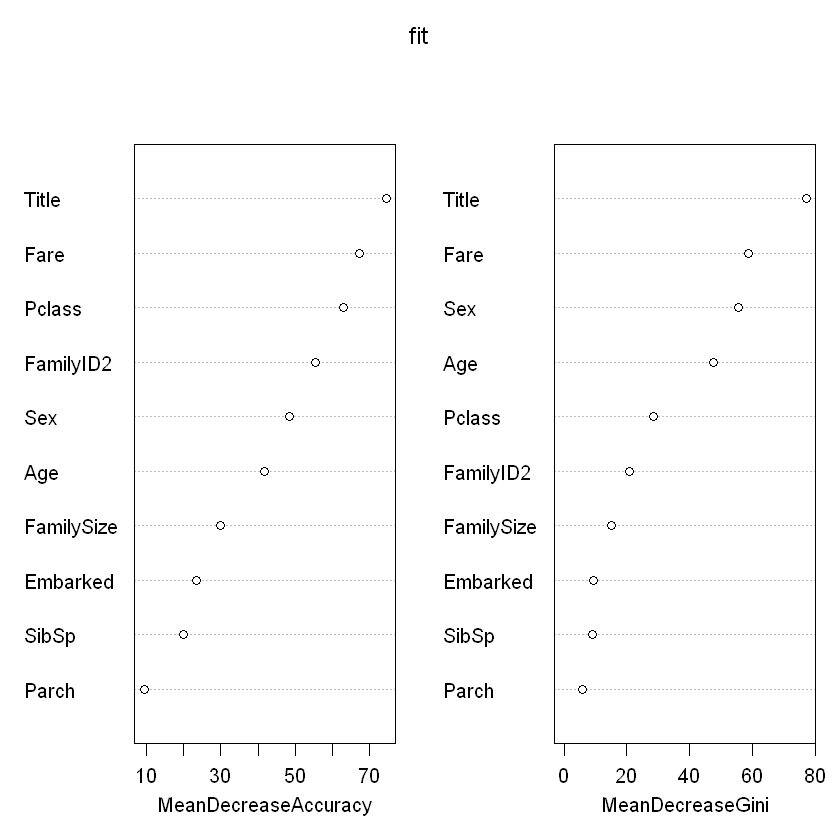

In [59]:
# let's check what variables were important
varImpPlot(fit)

In [60]:
# 1st fig denote how much accurate is our model if take all variables'''
#2nd fig denote how much pure is our node'

In [61]:
Prediction <- predict(fit, test)
submit <- data.frame(PassengerId = test$PassengerId, Survived = Prediction)
write.csv(submit, file = "firstforest.csv", row.names = FALSE)

In [62]:
nrow(train)

[1] 891

In [63]:
nrow(test)

[1] 418

In [64]:
# let's use some other ensemble model (conditional inference tree)
# it make decisions in slightly diff ways using a statistical 
# test

library(party)

Warning message:
"package 'party' was built under R version 3.4.4"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.4.3"Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.4.4"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.4.4"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.4.4"

In [69]:
set.seed(41)

In [70]:
fit <- cforest(as.factor(Survived) ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + Title + FamilySize + FamilyID,
                 data = train, 
                 controls=cforest_unbiased(ntree=2000, mtry=3))

In [71]:
fit


	 Random Forest using Conditional Inference Trees

Number of trees:  2000 

Response:  as.factor(Survived) 
Inputs:  Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Title, FamilySize, FamilyID 
Number of observations:  891 


In [75]:
nrow(test)

[1] 418

In [72]:
prediction <- predict(fit, test, OOB=TRUE, type = "response")


In [80]:
length(prediction)

[1] 891

In [76]:
submit <- data.frame(PassengerId = test$PassengerId, Survived = prediction)
write.csv(submit, file = "ensemble_model.csv", row.names = FALSE)

ERROR: Error in data.frame(PassengerId = test$PassengerId, Survived = prediction): arguments imply differing number of rows: 418, 891


In [77]:
?predict